In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lognrml/assignment_python.csv


### Importing Required Library.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

# 1. Load the Data in the file - "assignment_python.csv" given to you as a .csv using Pandas
### Loding CSV file data.

In [3]:
df=pd.read_csv("/kaggle/input/lognrml/assignment_python.csv")
dfx=df

#### Printing first 15 line of CSV / DataFrame

In [4]:
df.head(15)

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29
5,5636637,M,ANKARA,Turkey,100.0,2009-10-29,2022-03-15
6,5670349,M,hatay antakya,Turkey,50.0,2009-11-10,2022-03-16
7,5731391,M,İstanbul,Turkey,50.0,2009-12-03,2022-03-08
8,5769004,M,antalya,Turkey,100.0,2009-12-17,2022-07-07
9,5840612,M,tekirdağ çorlu,Turkey,50.0,2010-01-17,2022-07-06


# 2. Understand the data using the columns given (metadata descriptions below)

### Knowing the Shape of DataFrame for better understanding of Data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDCUSTOMER            22065 non-null  int64  
 1   GENDER                22065 non-null  object 
 2   CITY                  22065 non-null  object 
 3   COUNTRY               22065 non-null  object 
 4   FIRST_DEPOSIT_AMOUNT  22065 non-null  float64
 5   REGISTRATION_DATE     22065 non-null  object 
 6   DEPOSIT_DATE          22065 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [6]:
df.shape #Shape of DataFrame 

(22065, 7)

### Cheking the Data types

In [7]:
df.dtypes #Data types of DataFrame Columns 

IDCUSTOMER                int64
GENDER                   object
CITY                     object
COUNTRY                  object
FIRST_DEPOSIT_AMOUNT    float64
REGISTRATION_DATE        object
DEPOSIT_DATE             object
dtype: object

## Data Preprocessing:
> ### Cheking is there any column have **NULL** value.

In [8]:
df.isnull().any() #Cheking is there any column have NULL value

IDCUSTOMER              False
GENDER                  False
CITY                    False
COUNTRY                 False
FIRST_DEPOSIT_AMOUNT    False
REGISTRATION_DATE       False
DEPOSIT_DATE            False
dtype: bool

> ### (ID should be unique) Validating IDCUSTOMER

In [9]:
df['IDCUSTOMER'].is_unique   #IDCUSTOMER should be unique so cheking all value are unique or not

True

In [10]:
df['IDCUSTOMER'].nunique()   #Counting no of value are unique

22065

### Setting INDEX to 'IDCOUSTOMER'

In [11]:
#Setting INDEX to 'IDCOUSTOMER'
df=df.set_index("IDCUSTOMER")
df.head()

,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
IDCUSTOMER,,,,,,
5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29


### Validating Customer GENDER

In [12]:
print(df["GENDER"].unique()) #Gender should be either "MALE","FEMALE",or "other" 

#Another mathod to validate data
for x in df['GENDER']:
    if x not in ("M","F"):
        print("Error in Data",x)

['M' 'F' 'M  ']
Error in Data M  


In [13]:
print("Index of data where Error present:",df[df['GENDER']=='M  '].index.values)

Index of data where Error present: [147389271]


In [14]:
df.at[147389271, 'GENDER']='M'  #Correction in data

In [15]:
print(df["GENDER"].unique()) #Recheking 

['M' 'F']


### Correction in DataTypes 

In [16]:
#converting "REGISTRATION_DATE" and "DEPOSIT_DATE" into TimeSeries data
df.REGISTRATION_DATE = pd.to_datetime(df.REGISTRATION_DATE)
df.DEPOSIT_DATE = pd.to_datetime(df.DEPOSIT_DATE)

In [17]:
df.dtypes

GENDER                          object
CITY                            object
COUNTRY                         object
FIRST_DEPOSIT_AMOUNT           float64
REGISTRATION_DATE       datetime64[ns]
DEPOSIT_DATE            datetime64[ns]
dtype: object

# 3. Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454


In [18]:
#Life time of Coustomer from first Deposit day to till today.
today=pd.to_datetime(date.today())  #taking today date and converting it into datetime64[ns] data type.
df['CUSTOMER_LIFETIME'] = (today - df.DEPOSIT_DATE)

In [19]:
df

,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,CUSTOMER_LIFETIME
IDCUSTOMER,,,,,,,
5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,138 days
5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,252 days
5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,172 days
5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,252 days
5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,145 days
...,...,...,...,...,...,...,...
147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,51 days
147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,51 days
147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,51 days


### what is the lifetime in days for customer ID - 5371454¶

In [20]:
print(df.loc[5371454]['CUSTOMER_LIFETIME'])  #lifetime in days for customer ID - 5371454

145 days 00:00:00


# 4. Find the city & country with the highest number of unique customers

In [21]:
df["COUNTRY"].unique()

array(['Turkey'], dtype=object)

In [22]:
df['CITY'].nunique()

331

In [23]:
x=df['CITY'].unique()
print(x)

['ankara' 'elazığ' 'izmir' 'Üsküdar' 'sakarya' 'ANKARA' 'hatay antakya'
 'İstanbul' 'antalya' 'tekirdağ çorlu' 'istanbul kadiköy' 'milas'
 'eskısehır' 'Kahramanmaraş' 'KIRKLARELİ LULEBURGAZ' 'Hatay' 'Mersin'
 'yalova' 'SAKARYA AKYAZI' 'İstinye Sarıyer' 'BÜYÜKÇEKMECE' 'hatay'
 'İSTANBUL' 'konya' 'istanbul fatih' 'Ankara' 'MERKEZ' 'bayraklı'
 'istanbul' 'kayseri' 'merkez' 'lara/antalya' 'Keçiören' 'SİNCAN/ANKARA'
 'bahçelievler' 'istanbul maltepe' 'izmir menemen' 'gebze' 'Rize'
 'yıldırım' 'sanliurfa' 'mecidiyeköy' 'van' 'esenler' 'EDİRNE'
 'beşiktaş/istanbul' 'alsancak' 'konya selcuklu' 'muğla'
 'istanbul / zeytinburnu' 'adana/çukurova' 'çankırı' 'Çanakkale'
 'zeytinburnu' 'mimsin- kayseri' 'kumluca' 'Kızıltepe' 'bayrampasa'
 'afyon' 'TOKAT/Turhal' 'ANTALYA' 'k,maraş /elbistan' 'Meram'
 'İZMİR -- FOÇA' 'Burdur' 'Trabzon' 'BAŞAKŞEHİR/İSTANBUL' 'izmir/konak'
 'Kocaeli' 'istanbul kartal' 'İzmir Konak' 'Manisa' 'manisa merkez'
 'didim/aydın' 'Gümüşhane/merkez' 'bilecik/merkez' 'Antalya'
 'S

In [24]:
x=df['CITY'].value_counts().index #counting Highest no. of unique account city.
print("Find the city & country with the highest number of unique customers :===> ",x[0])

Find the city & country with the highest number of unique customers :===>  İstanbul


# 5. Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri


> # NOTE: 
> in this Qustion Dataset will be diffrent so instead of using players i'm using `Customer` 

### Cheking No. Unique Counntry:

In [25]:
df.COUNTRY.unique()

array(['Turkey'], dtype=object)

### No. of Unique Coustomer

In [26]:
dfx1=dfx.groupby(dfx["COUNTRY"]).count()
dfx1.IDCUSTOMER

COUNTRY
Turkey    22065
Name: IDCUSTOMER, dtype: int64

### specify the number of unique players from the city - Kayseri¶

In [27]:
#specify the number of unique players from the city - Kayseri¶
print("Specify the number of unique players from the city - Kayseri¶======>>>")
df1=df[df["CITY"]=="Kayseri"]
df1['CITY'].value_counts()

Specify the number of unique players from the city - Kayseri¶======>>>


Kayseri    369
Name: CITY, dtype: int64

# 6. Which city gives the third highest average first_deposit_amount and what is the average amount? 

In [28]:
#6.Which city gives the third highest average first_deposit_amount and what is the average amount?
df2=df.groupby(df["CITY"]).mean()
df2=df2.sort_values("FIRST_DEPOSIT_AMOUNT",ascending=False)
df2.iloc[2].name

'sarıçam/Adana'

In [29]:
df2.head(50)

,FIRST_DEPOSIT_AMOUNT
CITY,
Atasehir -İstanbul,100000.000000
Seyhan/Adana,10000.000000
sarıçam/Adana,9000.000000
İZMİR/karşıyaka,5000.000000
Ankara/Çankaya,5000.000000
GİRESUN MERKEZ,2500.000000
seferihisar/ İzmir,2000.000000
Başakşehir,2000.000000
diyarbakır/bağlar,2000.000000


# 7. Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.

In [30]:

df3=df.loc[:,["CITY",'GENDER']]
df3=df3.groupby(df3["CITY"]).count().sort_values("GENDER",ascending=False)[0:40]
df3

,GENDER
CITY,
İstanbul,4770
Bursa,1652
Diyarbakır,1307
Ankara,1182
İzmir,1151
Antalya,789
Adana,676
Kocaeli,635
Gaziantep,576


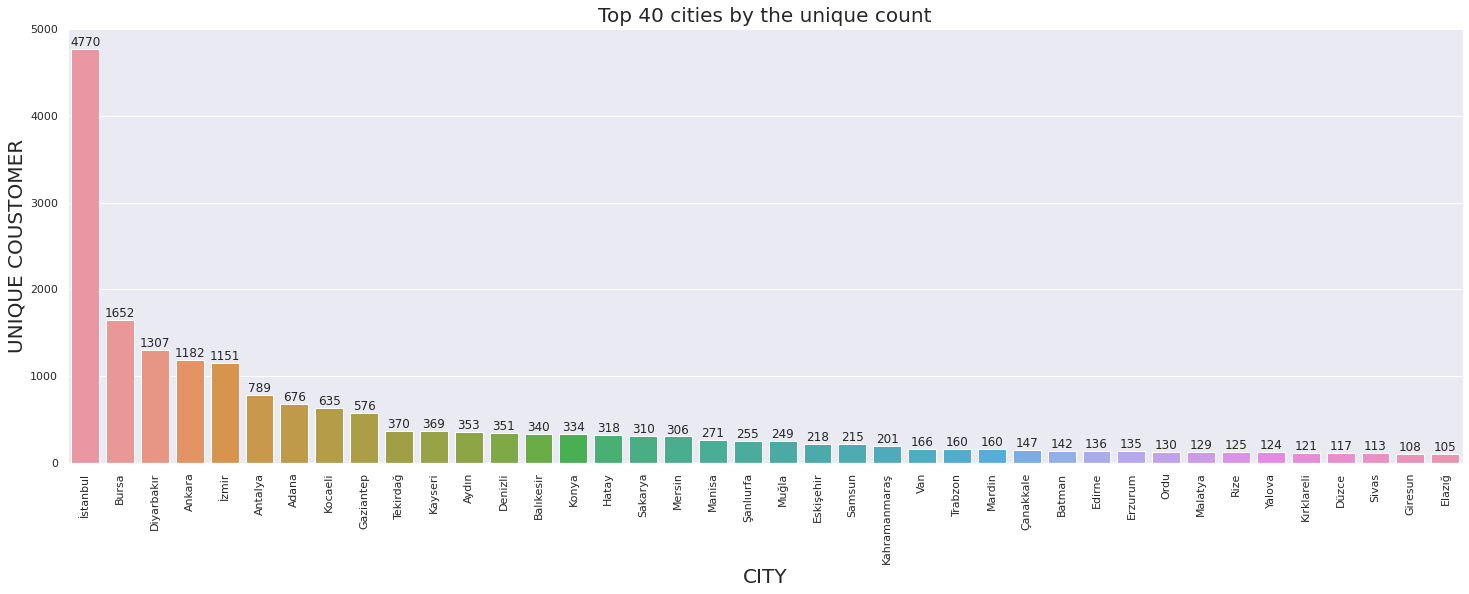

In [31]:
sns.set(rc={'figure.figsize':(25,8)})

ax = sns.barplot(y = 'GENDER', x =df3.index,data=df3) #here gender also represent unique coustomer count
plt.xticks(rotation=90)

ax.set_xlabel("CITY",fontsize = 20)
ax.set_ylabel('UNIQUE COUSTOMER',fontsize = 20)
ax.set_title("Top 40 cities by the unique count", fontsize = 20)

ax.bar_label(ax.containers[0],fmt='%i')
plt.show()

# 8. Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.


In [32]:
df["DEP_MONTH_YEAR"]=df['DEPOSIT_DATE'].dt.to_period('M')

In [33]:
conversion = []
Unique_month = list(df.DEP_MONTH_YEAR.unique().astype(str))
total = 0 
for values in df.DEP_MONTH_YEAR.unique():
    temp = df.loc[df['DEP_MONTH_YEAR'] == values]
    total = total + len(temp)
    x = len(temp.FIRST_DEPOSIT_AMOUNT.unique())
    y = len(temp.REGISTRATION_DATE.unique())
    conversion.append((x/y)*100)
print(total)
print(conversion)
print(Unique_month)

22065
[87.70053475935828, 60.0, 60.40462427745664, 53.605769230769226, 205.6338028169014, 49.30555555555556, 232.87671232876713, 53.753753753753756]
['2022-06', '2022-02', '2022-05', '2022-03', '2022-07', '2022-04', '2022-08', '2022-01']


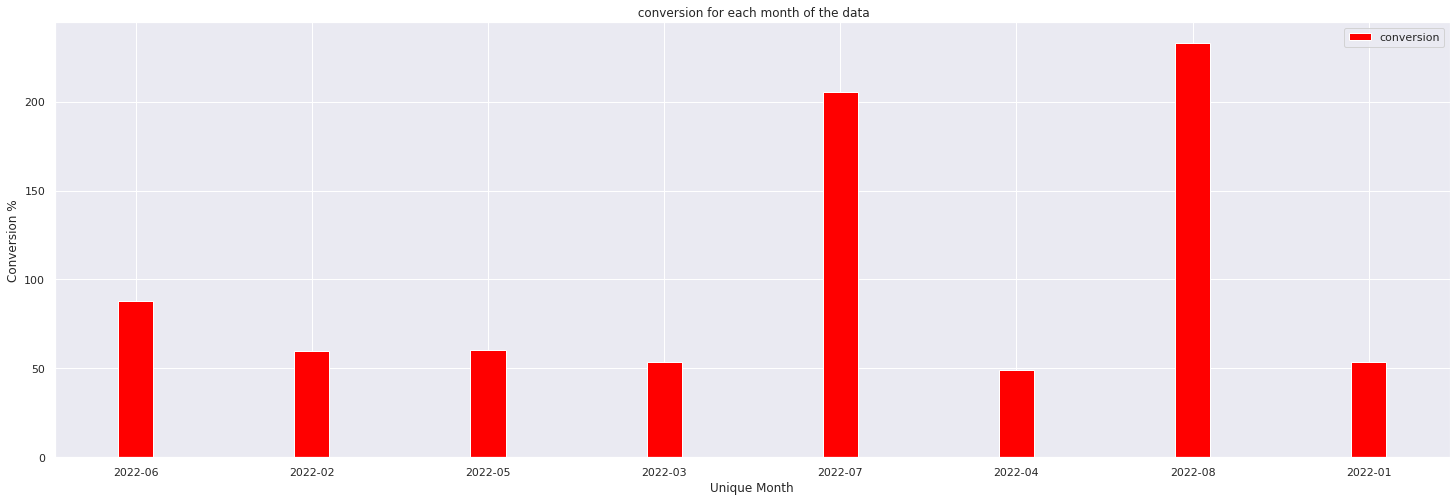

In [34]:
X = Unique_month
Y = conversion
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, Y, 0.2, label = 'conversion',color = 'red')
  
plt.xticks(X_axis, X)
plt.xlabel("Unique Month")
plt.ylabel("Conversion %")
plt.title(" conversion for each month of the data")
plt.legend()
plt.show()

# 9. What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)

In [35]:
d = dict(zip(Unique_month,conversion))
print("COnversoion rate in June 2022:",round(d['2022-06'],2))

COnversoion rate in June 2022: 87.7


# 10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns:

In [36]:
df_dt=pd.read_csv("/kaggle/input/lognrml/assignment_python.csv")

In [37]:
df_dt

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29
...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31


##     10.1. week of day column from the deposit date column


In [38]:
df_dt.DEPOSIT_DATE = pd.to_datetime(df_dt.DEPOSIT_DATE)
df_dt['day_of_week'] = df_dt['DEPOSIT_DATE'].dt.day_name()
df_dt

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,day_of_week
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Sunday
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Friday
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Monday
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Friday
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sunday
...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,Wednesday
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Wednesday
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Wednesday
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Wednesday


## 10.2. descriptive statistics of the table

In [39]:
df_dt.describe()

,IDCUSTOMER,FIRST_DEPOSIT_AMOUNT
count,2.206500e+04,22065.000000
mean,1.380593e+08,284.806530
std,3.272693e+07,943.993064
min,5.075649e+06,0.380000
25%,1.459097e+08,70.000000
50%,1.465139e+08,100.000000
75%,1.471483e+08,250.000000
max,1.478480e+08,100000.000000


## 10.3. make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.


In [40]:
df_dt['binned']=pd.cut(df_dt['FIRST_DEPOSIT_AMOUNT'], bins=pd.interval_range(start=0,end=100000,periods=200))
df_dt

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,day_of_week,binned
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Sunday,"(0, 500]"
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Friday,"(0, 500]"
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Monday,"(0, 500]"
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Friday,"(0, 500]"
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sunday,"(500, 1000]"
...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,Wednesday,"(0, 500]"
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Wednesday,"(0, 500]"
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Wednesday,"(0, 500]"
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Wednesday,"(0, 500]"


# 11. Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

In [41]:
list1=[]
temp = df.copy()
date='2022-05-04'
list2=list(temp.REGISTRATION_DATE.dt.date.astype(str))
for date in list2[0:100]: #you want whole csv to print remove slicing 
    for i in range(7):
        temp['REGISTRATION_DATE'] = temp['REGISTRATION_DATE']- np.timedelta64(1,'D')    
        list1.append(temp[temp['REGISTRATION_DATE']==date].GENDER.count())
    print("7-Day Moving average of date==>",date,'is',round(sum(list1)/7,4))

7-Day Moving average of date==> 2009-01-10 is 0.0
7-Day Moving average of date==> 2009-03-01 is 0.0
7-Day Moving average of date==> 2009-04-06 is 0.0
7-Day Moving average of date==> 2009-05-02 is 0.0
7-Day Moving average of date==> 2009-06-07 is 0.0
7-Day Moving average of date==> 2009-10-29 is 0.0
7-Day Moving average of date==> 2009-11-10 is 0.0
7-Day Moving average of date==> 2009-12-03 is 0.0
7-Day Moving average of date==> 2009-12-17 is 0.0
7-Day Moving average of date==> 2010-01-17 is 0.0
7-Day Moving average of date==> 2010-01-29 is 0.0
7-Day Moving average of date==> 2010-02-20 is 0.0
7-Day Moving average of date==> 2010-03-05 is 0.0
7-Day Moving average of date==> 2010-05-20 is 0.0
7-Day Moving average of date==> 2010-09-01 is 0.1429
7-Day Moving average of date==> 2010-09-04 is 0.1429
7-Day Moving average of date==> 2010-09-05 is 0.2857
7-Day Moving average of date==> 2010-11-08 is 0.4286
7-Day Moving average of date==> 2010-12-15 is 0.5714
7-Day Moving average of date==> 201